# Importing Libraries

In [8]:
import pandas as pd
import pickle
import seaborn as sns
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
!python --version

Python 3.9.12


# Reading data file

In [3]:

data = pd.read_csv("carindia-2021.csv")

In [4]:

data

,model_year,maker,model_name,city,distance_covered (km),fuel_type,pre_owner,price (₹)
0,2012,Maruti,Alto K10 VXI,Mumbai,29067,Petrol,2nd Owner,165199
1,2011,Hyundai,i20 SPORTZ 1.2 O,Mumbai,36791,Petrol,2nd Owner,326099
2,2010,Maruti,A Star VXI,Mumbai,35171,Petrol,1st Owner,195199
3,2011,Hyundai,Santro Xing GLS,Mumbai,19908,Petrol,1st Owner,195199
4,2012,Hyundai,Santro Xing GLS,Mumbai,43847,Petrol,3rd Owner,203299
...,...,...,...,...,...,...,...,...
3360,2014,Honda,City S MT DIESEL,Kolkata,61643,Diesel,3rd Owner,500000
3361,2006,Maruti,Wagon R LXI,Kolkata,26500,Petrol,1st Owner,100000
3362,2016,Maruti,S Cross ZETA 1.3,Kolkata,57828,Diesel,1st Owner,550000
3363,2012,BMW,3 Series 320D,Kolkata,23782,Diesel,2nd Owner,1200000


# Data preprocessing

In [253]:

data.shape

(3365, 8)

In [254]:
data.describe()

,model_year,distance_covered (km),price (₹)
count,3365.000000,3365.000000,3.365000e+03
mean,2013.876374,60937.813967,4.336549e+05
std,3.035588,41342.775191,2.595909e+05
min,2001.000000,60.000000,2.700000e+04
25%,2012.000000,30598.000000,2.769990e+05
50%,2014.000000,53488.000000,3.647990e+05
75%,2016.000000,82414.000000,4.975990e+05
max,2021.000000,428123.000000,3.600000e+06


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   model_year             3365 non-null   int64 
 1   maker                  3365 non-null   object
 2   model_name             3365 non-null   object
 3   city                   3365 non-null   object
 4   distance_covered (km)  3365 non-null   int64 
 5   fuel_type              3365 non-null   object
 6   pre_owner              3365 non-null   object
 7   price (₹)              3365 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 210.4+ KB


In [256]:
#unique values
data['model_name'].unique()

array(['Alto K10 VXI', 'i20 SPORTZ 1.2 O', 'A Star VXI',
       'Santro Xing GLS', 'Eon SPORTZ', 'Wagon R 1.0 LXI',
       'i10 MAGNA 1.1 IRDE2', 'Swift Dzire VXI', 'Brio 1.2 S MT I VTEC',
       'Swift Dzire VXI 1.2 BS IV', 'Etios Liva G', 'Wagon R 1.0 VXI',
       'Alto LXI', 'Zen Estilo LXI', 'i10 MAGNA 1.2 KAPPA2',
       'Wagon R 1.0 LXI CNG', 'Figo 1.2 ZXI DURATEC',
       'Grand i10 SPORTZ 1.2 KAPPA VTVT', 'Swift ZXI',
       'Jetta TRENDLINE 1.6', 'i10 SPORTZ 1.1 IRDE2', 'Etios G',
       'Celerio ZXI AMT', 'Alto 800 VXI', 'Swift VXI', 'Swift VDI',
       'Grand i10 SPORTS 1.2 VTVT', 'i10 SPORTZ 1.2 KAPPA2',
       'Amaze 1.2 SMT I VTEC', 'Ritz VXI BS IV', 'Alto 800 LXI',
       'i10 SPORTZ 1.2 AT KAPPA2', 'i20 ASTA 1.2', 'Alto K10 LXI',
       'Celerio VXI', 'Celerio VXI AMT', 'Alto K10 VXI AMT',
       'SELTOS GTX + AT PETROL', 'Grand i10 ASTA 1.2 KAPPA VTVT',
       'Kuv100 K6+ 6 STR', 'Wagon R VXI', 'Celerio ZXI OPT',
       'Grand i10 ASTA 1.2 (O) VTVT', 'i20 MAGNA 1.2 VTV

# Checking null values

In [257]:
#checking null values
data.isnull().sum()


model_year               0
maker                    0
model_name               0
city                     0
distance_covered (km)    0
fuel_type                0
pre_owner                0
price (₹)                0
dtype: int64

In [258]:
data1=data.groupby('model_name')
data2=data1.first()
data2.head(50)

,model_year,maker,city,distance_covered (km),fuel_type,pre_owner,price (₹)
model_name,,,,,,,
3 Series 320 D PERFORMANCE EDITION,2011,BMW,Pune,90696,Diesel,2nd Owner,661799
3 Series 320D,2013,BMW,Pune,38211,Diesel,3rd Owner,1071699
3 Series 320D LUXURYLINE,2012,BMW,New Delhi,83797,Diesel,2nd Owner,912599
3 Series 320D SPORTLINE,2014,BMW,Mumbai,76122,Diesel,1st Owner,1543099
5 Series 520D 2.0,2013,BMW,Mumbai,175025,Diesel,1st Owner,1317699
5 Series 525D,2012,BMW,Chennai,109519,Diesel,1st Owner,1208199
800 AC,2002,Maruti,Ahmedabad,77323,Petrol + LPG,2nd Owner,35000
A Star LXI,2009,Maruti,New Delhi,30403,Petrol,1st Owner,177199
A Star VXI,2010,Maruti,Mumbai,35171,Petrol,1st Owner,195199


In [259]:

data['model_name1'] = data['model_name'].str.extract(r'(\S{3,}|\S{1,2}\s+\S+)', expand=True)
data


,model_year,maker,model_name,city,distance_covered (km),fuel_type,pre_owner,price (₹),model_name1
0,2012,Maruti,Alto K10 VXI,Mumbai,29067,Petrol,2nd Owner,165199,Alto
1,2011,Hyundai,i20 SPORTZ 1.2 O,Mumbai,36791,Petrol,2nd Owner,326099,i20
2,2010,Maruti,A Star VXI,Mumbai,35171,Petrol,1st Owner,195199,A Star
3,2011,Hyundai,Santro Xing GLS,Mumbai,19908,Petrol,1st Owner,195199,Santro
4,2012,Hyundai,Santro Xing GLS,Mumbai,43847,Petrol,3rd Owner,203299,Santro
...,...,...,...,...,...,...,...,...,...
3360,2014,Honda,City S MT DIESEL,Kolkata,61643,Diesel,3rd Owner,500000,City
3361,2006,Maruti,Wagon R LXI,Kolkata,26500,Petrol,1st Owner,100000,Wagon
3362,2016,Maruti,S Cross ZETA 1.3,Kolkata,57828,Diesel,1st Owner,550000,S Cross
3363,2012,BMW,3 Series 320D,Kolkata,23782,Diesel,2nd Owner,1200000,3 Series


In [260]:
data['model_name1'].unique()

array(['Alto', 'i20', 'A Star', 'Santro', 'Eon', 'Wagon', 'i10', 'Swift',
       'Brio', 'Etios', 'Zen', 'Figo', 'Grand', 'Jetta', 'Celerio',
       'Amaze', 'Ritz', 'SELTOS', 'Kuv100', 'Baleno', 'Polo', 'Verna',
       'NEW', 'Go Plus', 'Benz', 'Elite', 'TIGOR', 'City', 'Jazz',
       'Vento', 'Ertiga', 'Kwid', 'Redi', 'IGNIS', 'WR-V', 'TUV300',
       'Vitara', 'Innova', 'Rapid', 'Dzire', 'Creta', 'VENUE', 'XUV500',
       'Sunny', 'Corolla', 'Terrano', 'Fortuner', 'NEXON', 'Tiago',
       'Compass', 'Ciaz', 'Scorpio', 'Duster', 'Superb', 'Accord',
       'HECTOR', 'Ecosport', 'S Cross', 'Yeti', 'New', '5 Series',
       'Prius', 'Eeco', 'Ameo', 'Quanto', 'Xcent', 'Manza', 'Civic',
       'Hexa', '3 Series', 'Santa', 'Mobilio', 'Beat', 'Laura', 'Rexton',
       'Punto', 'Cruze', 'Camry', 'CRV', 'S PRESSO', 'Nano', 'TRIBER',
       'Fiesta', 'YARIS', 'GRAND', 'Spark', 'OMNI', 'Micra', 'E2O',
       'Indica', 'A3 35TDI', 'Omni', 'Pulse', 'Thar', 'Indigo', 'BR-V',
       'Q3 35', 'Safar

In [261]:
data['model_name1'].count()

3365

In [262]:
data['model_name1'].value_counts()

Swift      465
Alto       393
Wagon      234
i10        209
Grand      133
          ... 
Sail         1
Octavia      1
Fabia        1
A4 2.0       1
Fluence      1
Name: model_name1, Length: 127, dtype: int64

# removing polluted data columns

In [263]:
#removing unwanted columns
f=data.drop(['city','model_name'],axis=1)
f

,model_year,maker,distance_covered (km),fuel_type,pre_owner,price (₹),model_name1
0,2012,Maruti,29067,Petrol,2nd Owner,165199,Alto
1,2011,Hyundai,36791,Petrol,2nd Owner,326099,i20
2,2010,Maruti,35171,Petrol,1st Owner,195199,A Star
3,2011,Hyundai,19908,Petrol,1st Owner,195199,Santro
4,2012,Hyundai,43847,Petrol,3rd Owner,203299,Santro
...,...,...,...,...,...,...,...
3360,2014,Honda,61643,Diesel,3rd Owner,500000,City
3361,2006,Maruti,26500,Petrol,1st Owner,100000,Wagon
3362,2016,Maruti,57828,Diesel,1st Owner,550000,S Cross
3363,2012,BMW,23782,Diesel,2nd Owner,1200000,3 Series


# creating dataframes for each model

In [264]:
c=f.loc[(f.model_name1=="i10")]
c

,model_year,maker,distance_covered (km),fuel_type,pre_owner,price (₹),model_name1
9,2014,Hyundai,13068,Petrol,1st Owner,369699,i10
22,2011,Hyundai,43411,Petrol,2nd Owner,242999,i10
30,2014,Hyundai,24244,Petrol,2nd Owner,273299,i10
35,2011,Hyundai,39413,Petrol,1st Owner,255199,i10
43,2010,Hyundai,28925,Petrol,2nd Owner,226799,i10
...,...,...,...,...,...,...,...
3195,2011,Hyundai,51086,Petrol,1st Owner,259299,i10
3233,2013,Hyundai,178433,Petrol + CNG,1st Owner,267599,i10
3249,2013,Hyundai,47894,Petrol + CNG,1st Owner,265099,i10
3316,2013,Hyundai,55485,Petrol,1st Owner,300000,i10


In [265]:
d=f.loc[(f.model_name1=='Wagon')]
d

,model_year,maker,distance_covered (km),fuel_type,pre_owner,price (₹),model_name1
8,2013,Maruti,13688,Petrol,1st Owner,326199,Wagon
14,2011,Maruti,18514,Petrol,1st Owner,269399,Wagon
16,2012,Maruti,20712,Petrol,2nd Owner,258399,Wagon
19,2012,Maruti,39652,Petrol,3rd Owner,288299,Wagon
21,2014,Maruti,6858,Petrol,1st Owner,358399,Wagon
...,...,...,...,...,...,...,...
3314,2014,Maruti,95432,Petrol + CNG,1st Owner,270000,Wagon
3327,2013,Maruti,22008,Petrol,1st Owner,332599,Wagon
3331,2014,Maruti,25852,Petrol,1st Owner,345499,Wagon
3357,2001,Maruti,72000,Petrol,2nd Owner,38000,Wagon


In [266]:
e=f.loc[(f.model_name1=="Grand")]
e

,model_year,maker,distance_covered (km),fuel_type,pre_owner,price (₹),model_name1
27,2014,Hyundai,18534,Petrol,2nd Owner,339099,Grand
41,2015,Hyundai,9307,Petrol,1st Owner,417699,Grand
62,2014,Hyundai,37891,Petrol,2nd Owner,361699,Grand
69,2014,Hyundai,42967,Petrol,2nd Owner,369099,Grand
70,2014,Hyundai,35944,Petrol,1st Owner,380999,Grand
...,...,...,...,...,...,...,...
3220,2017,Hyundai,76337,Petrol + CNG,1st Owner,454899,Grand
3254,2018,Hyundai,37000,Petrol + CNG,1st Owner,486499,Grand
3255,2018,Hyundai,42498,Petrol,1st Owner,510199,Grand
3291,2016,Hyundai,20970,Petrol,1st Owner,450000,Grand


In [267]:
t=pd.concat([c,d,e])
t

,model_year,maker,distance_covered (km),fuel_type,pre_owner,price (₹),model_name1
9,2014,Hyundai,13068,Petrol,1st Owner,369699,i10
22,2011,Hyundai,43411,Petrol,2nd Owner,242999,i10
30,2014,Hyundai,24244,Petrol,2nd Owner,273299,i10
35,2011,Hyundai,39413,Petrol,1st Owner,255199,i10
43,2010,Hyundai,28925,Petrol,2nd Owner,226799,i10
...,...,...,...,...,...,...,...
3220,2017,Hyundai,76337,Petrol + CNG,1st Owner,454899,Grand
3254,2018,Hyundai,37000,Petrol + CNG,1st Owner,486499,Grand
3255,2018,Hyundai,42498,Petrol,1st Owner,510199,Grand
3291,2016,Hyundai,20970,Petrol,1st Owner,450000,Grand


In [268]:
g=pd.get_dummies(t,dtype=int)
g

,model_year,distance_covered (km),price (₹),maker_Fiat,maker_Hyundai,maker_Maruti,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,pre_owner_4th Owner,model_name1_Grand,model_name1_Wagon,model_name1_i10
9,2014,13068,369699,0,1,0,0,1,0,0,1,0,0,0,0,0,1
22,2011,43411,242999,0,1,0,0,1,0,0,0,1,0,0,0,0,1
30,2014,24244,273299,0,1,0,0,1,0,0,0,1,0,0,0,0,1
35,2011,39413,255199,0,1,0,0,1,0,0,1,0,0,0,0,0,1
43,2010,28925,226799,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,2017,76337,454899,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3254,2018,37000,486499,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3255,2018,42498,510199,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3291,2016,20970,450000,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [269]:
y=g['price (₹)']
y

9       369699
22      242999
30      273299
35      255199
43      226799
         ...  
3220    454899
3254    486499
3255    510199
3291    450000
3330    373099
Name: price (₹), Length: 576, dtype: int64

In [270]:
x=g.drop(['price (₹)'],axis=1)   #modelyear,dist,fueltype,preowner,modelname
x

,model_year,distance_covered (km),maker_Fiat,maker_Hyundai,maker_Maruti,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,pre_owner_4th Owner,model_name1_Grand,model_name1_Wagon,model_name1_i10
9,2014,13068,0,1,0,0,1,0,0,1,0,0,0,0,0,1
22,2011,43411,0,1,0,0,1,0,0,0,1,0,0,0,0,1
30,2014,24244,0,1,0,0,1,0,0,0,1,0,0,0,0,1
35,2011,39413,0,1,0,0,1,0,0,1,0,0,0,0,0,1
43,2010,28925,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,2017,76337,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3254,2018,37000,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3255,2018,42498,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3291,2016,20970,0,1,0,0,1,0,0,1,0,0,0,1,0,0


# splitting the data

In [271]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=41)

In [272]:
x_train.shape

(374, 16)

In [273]:
y_train.shape

(374,)

In [274]:
x_test.shape

(202, 16)

In [275]:
y_test.shape

(202,)

# Applying the model

In [276]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [277]:
reg.fit(x_train,y_train)  #fitting

LinearRegression()

In [278]:
ypred=reg.predict(x_test)

In [279]:
ypred

array([292591.60143689, 304342.91617558, 247517.4390822 , 221803.45880737,
       277226.7172531 , 398304.77148519, 276974.20709828, 414105.58012576,
       455051.35978511, 267964.49012943, 397281.90241057, 432194.40463275,
       278103.73618302, 384409.12970319, 451621.51270165, 324010.98164713,
       381756.61780225, 476635.10110121, 381902.84263702, 452255.59375712,
       421176.19453964, 476488.87664307, 249860.7674725 , 409854.1312537 ,
       304259.78097129, 250463.65616018, 219355.88112658, 389609.7484876 ,
       455506.7681305 , 299003.55494658, 322227.5667889 , 303536.20361804,
       268210.33390459, 264247.80433661, 354510.8070185 , 226444.0638905 ,
       493536.67775059, 312577.05777349, 259785.13233551, 328678.85351665,
       500421.12781504, 294722.14959943, 322726.2061861 , 435026.24940103,
       353076.56017362, 265235.39960884, 406963.72428476, 392246.73744354,
       476486.236014  , 427929.1370695 , 252409.85534266, 291875.43605559,
       437182.32303678, 4

In [280]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.7830649779763932

In [281]:
results=pd.DataFrame(columns=['price','predicted'])
results['price']=y_test
results['predicted']=ypred
results=results.reset_index()
results['ID']=results.index
results.head(15)


,index,price,predicted,ID
0,2972,277999,292591.601437,0
1,1271,333799,304342.916176,1
2,2098,225499,247517.439082,2
3,2912,202199,221803.458807,3
4,1769,255599,277226.717253,4
5,178,345799,398304.771485,5
6,1180,314899,276974.207098,6
7,927,364899,414105.580126,7
8,3291,450000,455051.359785,8
9,1797,276299,267964.490129,9


# data visualisation

<AxesSubplot:xlabel='ID', ylabel='price'>

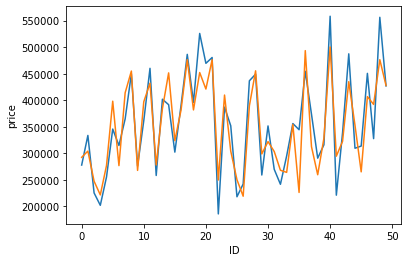

In [282]:
import seaborn as sns
#import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='price',data=results.head(50))
sns.lineplot(x='ID',y='predicted',data=results.head(50))


In [283]:
cor_mat=g.corr()
cor_mat

,model_year,distance_covered (km),price (₹),maker_Fiat,maker_Hyundai,maker_Maruti,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,pre_owner_4th Owner,model_name1_Grand,model_name1_Wagon,model_name1_i10
model_year,1.000000,-0.366251,0.835986,-0.005936,0.026099,-0.025164,0.067393,-0.089880,0.117489,-0.100488,0.213024,-0.149535,-0.148223,-0.014964,0.579977,-0.025164,-0.482611
distance_covered (km),-0.366251,1.000000,-0.434009,0.036236,-0.016260,0.010175,0.082756,-0.253371,0.196374,0.133129,-0.070025,0.052983,0.030886,0.042361,-0.242923,0.010175,0.202514
price (₹),0.835986,-0.434009,1.000000,-0.041808,0.246237,-0.239807,-0.010517,0.059808,-0.024404,-0.090779,0.222203,-0.156531,-0.151075,-0.024586,0.656259,-0.239807,-0.330221
maker_Fiat,-0.005936,0.036236,-0.041808,1.000000,-0.099656,-0.069171,0.525991,-0.175040,-0.024344,-0.009924,-0.031670,-0.003601,0.076355,-0.004936,0.152619,-0.069171,-0.063106
maker_Hyundai,0.026099,-0.016260,0.246237,-0.099656,1.000000,-0.985745,0.009205,0.192438,-0.189266,-0.081176,-0.059223,0.008309,0.112591,-0.010406,0.426318,-0.985745,0.633243
maker_Maruti,-0.025164,0.010175,-0.239807,-0.069171,-0.985745,1.000000,-0.098167,-0.163341,0.193874,0.083064,0.064731,-0.007722,-0.125794,0.011268,-0.453230,1.000000,-0.624216
fuel_type_Diesel,0.067393,0.082756,-0.010517,0.525991,0.009205,-0.098167,1.000000,-0.344834,-0.034549,-0.014085,-0.108397,0.061790,0.108362,-0.007005,0.216594,-0.098167,-0.089559
fuel_type_Petrol,-0.089880,-0.253371,0.059808,-0.175040,0.192438,-0.163341,-0.344834,1.000000,-0.845858,-0.344834,0.015711,0.005279,-0.023966,-0.075599,-0.012249,-0.163341,0.177579
fuel_type_Petrol + CNG,0.117489,0.196374,-0.024404,-0.024344,-0.189266,0.193874,-0.034549,-0.845858,1.000000,-0.034549,0.062690,-0.059943,-0.037444,0.092792,-0.052050,0.193874,-0.152413
fuel_type_Petrol + LPG,-0.100488,0.133129,-0.090779,-0.009924,-0.081176,0.083064,-0.014085,-0.344834,-0.034549,1.000000,-0.076671,0.061790,0.040518,-0.007005,-0.065027,0.083064,-0.027853


<AxesSubplot:>

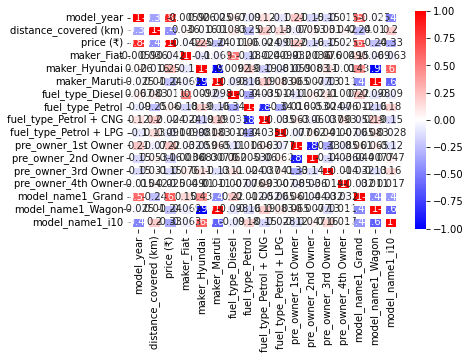

In [284]:
#plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidth=5,cmap='bwr')

In [285]:
#this is for prediction of new vehicle 
new=[[2014,13068,0,1,0,0,1,0,0,1,0,0,0,0,0,1]]
real=reg.predict(new)
real

array([376708.71600688])

# elastic regression

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [289]:

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

regressor = GridSearchCV(elastic, parameters)

regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [290]:
regressor.best_params_

{'alpha': 0.01}

In [291]:
elastic=ElasticNet(alpha=.01)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [292]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.7859923528448889

In [293]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

1522388712.6078467

In [294]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
#Results['km']=X_test['km']
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)


,index,Actual,Predicted,Id
0,2972,277999,292795.562583,0
1,1271,333799,304713.578096,1
2,2098,225499,247528.712400,2
3,2912,202199,221293.622055,3
4,1769,255599,277306.611004,4
5,178,345799,396545.331925,5
6,1180,314899,277050.074121,6
7,927,364899,412072.012201,7
8,3291,450000,453650.050804,8
9,1797,276299,268301.828395,9


[]

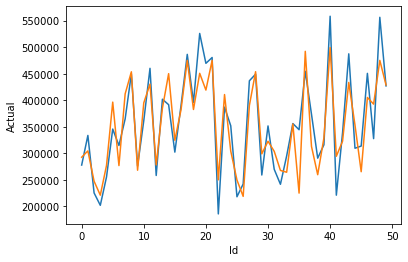

In [295]:

sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

In [296]:
filename='carindia'             
pickle.dump(reg,open(filename,'wb'))